# Prompt:


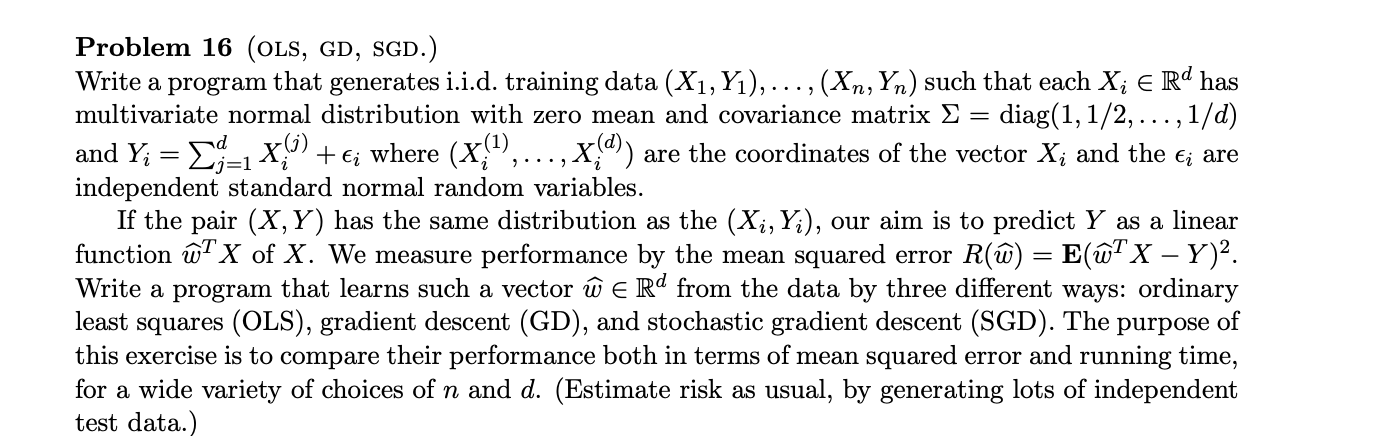

# Basic imports and functions:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

from statistics import mean

## Data generator: 

Given n and d, outputs X (one train and one test) and y (one train and one test. Train and test sets are the same size.

In [26]:
def generate(n, d):

  # 1. Generate X:

  # 1.1 Parameters:
  mean = [0] * d
  cov = np.diag([1/(i+1) for i in range(d)])

  # 1.2 Generate:
  X = np.array(np.random.multivariate_normal(mean, cov, n))

  # 2. Generate y:
  y = np.sum(X, axis=1) + np.random.normal(loc=0.0, scale=1.0, size=None)
  y = np.array(y)

  # 3. Split data into train and test(independent data):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

  return X_train, X_test, y_train, y_test

X_train, _, y_train, _ = generate(10, 5)

print("X_train: {}".format(X_train))
print("y_train: {}".format(y_train))


X_train: [[-0.96931149  0.15549111 -0.1577183   0.53607542 -0.07200088]
 [ 0.37017379 -0.70738518  0.01405607 -0.64752239  0.46528248]
 [ 1.316877   -0.45358893  0.03881609  0.02773937 -0.64427505]
 [ 1.34032473 -0.49665366 -0.30428015 -0.52027185 -0.46798893]
 [-0.07224579  1.16034688  0.42865805  0.05464493  0.04501105]]
y_train: [1.17851085 1.18057976 1.97154346 1.23710514 3.3023901 ]


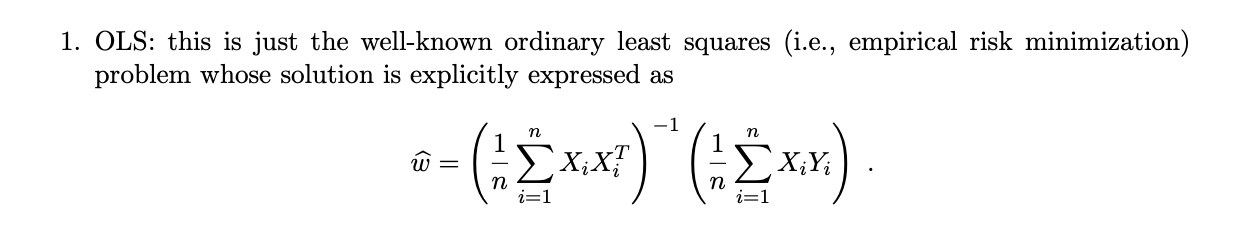

## OLS:

We take advantage of sklearn's function.

Fits an OLS model with the train data, and outputs the mean squared error for independent data (test set) and the time it took for everything to run.

In [64]:
def OLS(X_train, X_test, y_train, y_test):

  start = datetime.now()
  model = LinearRegression(fit_intercept= False).fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  finish = datetime.now()
  #print(model.coef_)
  return mse, finish - start

X_train, X_test, y_train, y_test = generate(100, 5)
OLS(X_train, X_test, y_train, y_test)

(0.07844580909226537, datetime.timedelta(microseconds=1690))

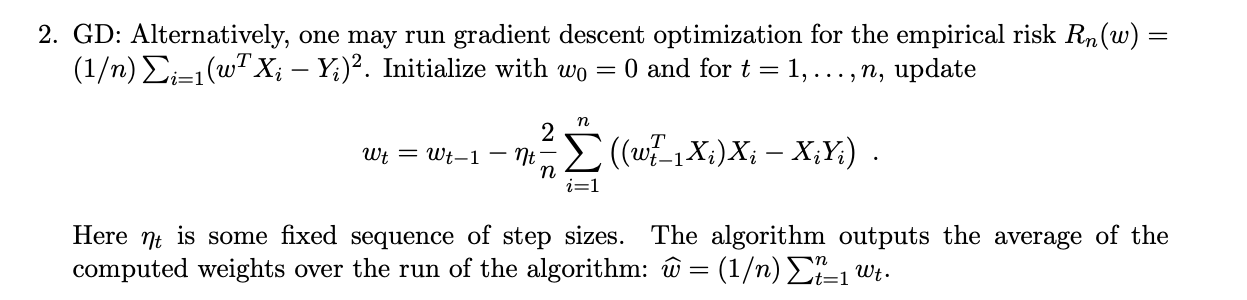

## Gradient Descent:

Takes as inputs the train and test data, which type of eta we want ("constant" or "decreasing") and -if needed- eta.

With that, it computes $\hat{w}$ as the matricial multiplication and predicts $\hat{y}$ for independent data. Outputs the mean squared error for independent data (test set) and the time it took for everything to run.

In [31]:
def GD(X_train, X_test, y_train, y_test, eta_type, eta = 0.1):
  start = datetime.now()
  
  n = X_train.shape[0]
  
  # 1. Initiate w:
  w = np.array([[0] * X_train.shape[1]])
  w_list = np.array(w)

  # 2. Update w:
  
  # 2.1. Fixed eta:
  if eta_type == "constant":
    
    # 2.1.2. Compute w:
    for t in range(n):
      w = w - (eta * 2 / n) * (np.matmul(np.matmul(w, X_train.T), X_train) - np.matmul(y_train.T, X_train)) #w_t-1 - 2 eta/n *[w_t-1 X.T X - y.T X]
    # 2.1.3. Save w to list:  
      w_list = np.concatenate((w_list, w), axis = 0)
      
  
  # 2.2. Dynamic eta:
  if eta_type == "decreasing":
    
    # 2.2.2. Compute w:
    for t in range(n):
      eta = 1 / ((t+1)**0.5)
      w = w - (eta * 2 / n) * (np.matmul(np.matmul(w, X_train.T), X_train) - np.matmul(y_train.T, X_train)) #w_t-1 - 2 eta/n *[w X.T X - y.T X]
    # 2.2.3. Save w to list:
      w_list = np.concatenate((w_list, w), axis = 0)
      
  
  # 3. Compute w_hat as an average of all the others:

  w_hat = np.mean(w_list, axis=0)    
  #print(w_hat)
  # 4. Predict:
  y_pred = np.matmul(w_hat, X_test.T).T

  mse = mean_squared_error(y_test, y_pred)
  finish = datetime.now()

  return mse, finish - start

X_train, X_test, y_train, y_test = generate(1000, 10)
GD(X_train, X_test, y_train, y_test, "constant", eta = 0.5)

(3.2049053868861175, datetime.timedelta(microseconds=10674))

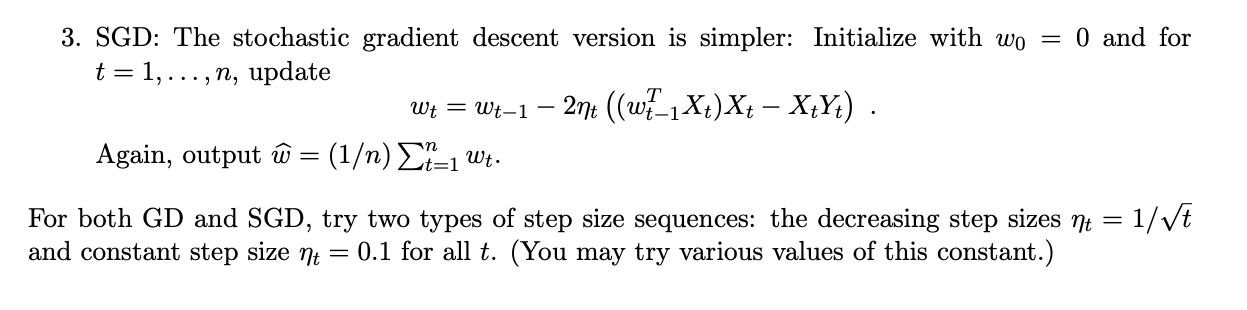

## Stochastic Gradient Descent:

Works in the same way as SG, except it takes only one observation each time to compute $\hat{w}$, therefore it is just a vector multiplication.

In [32]:
def SGD(X_train, X_test, y_train, y_test, eta_type, eta = 0.1):
  start = datetime.now()
  
  n = X_train.shape[0]
  
  # 1. Initiate w:
  w = np.array([[0] * X_train.shape[1]])
  w_list = np.array(w)

  # 2. Update w:
  
  # 2.1. Fixed eta:
  if eta_type == "constant":
    
    # 2.1.2. Compute w:
    eta = 0.1
    for t in range(n):
      w = w - (eta * 2) * (np.dot(w, X_train[t].T) * X_train[t] - X_train[t] * y_train[t]) 
    # 2.1.3. Save w to list:  
      w_list = np.concatenate((w_list, w), axis = 0)
  
  
  # 2.2. Dynamic eta:
  if eta_type == "decreasing":
    
    # 2.2.2. Compute w:
    for t in range(n):
      eta = 1 / ((t+1)**0.5)
      w = w - (eta * 2) * (np.dot(w, X_train[t].T) * X_train[t] - X_train[t] * y_train[t]) 
    # 2.2.3. Save w to list:
      w_list = np.concatenate((w_list, w), axis = 0)
  
  
  # 3. Compute w_hat as an average of all the others:
  w_hat = np.mean(w_list, axis=0)    
  #print(w_hat)
  # 4. Predict:
  y_pred = np.matmul(w_hat, X_test.T).T


  mse = mean_squared_error(y_test, y_pred)
  finish = datetime.now()

  return mse, finish - start

X_train, X_test, y_train, y_test = generate(10000, 2)
SGD(X_train, X_test, y_train, y_test, eta_type, eta = 0.99)

(0.6004782626361184, datetime.timedelta(microseconds=68917))

# Experiments

## OLS

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


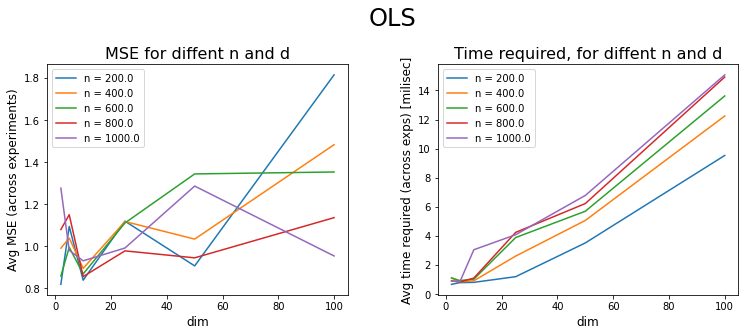

In [66]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2)) #divided by two, since it uses half the data for training and half for predicting
  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = OLS(X_train, X_test, y_train, y_test)
      #mse, time = OLS(X_train, X_train, y_train, y_train)

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('OLS', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    #x_values.append(de)
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)


## Gradient Descent

### Fixed eta:

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


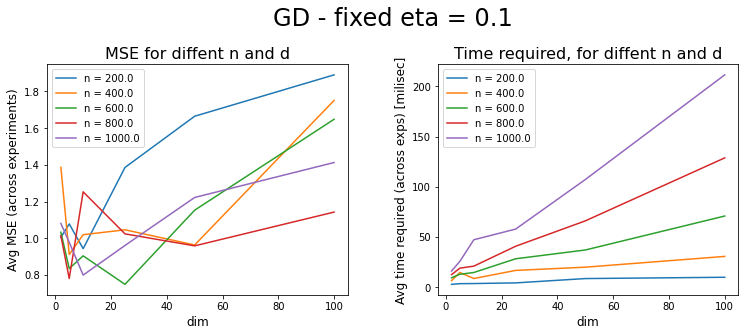

In [63]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = GD(X_train, X_test, y_train, y_test, "constant", eta = 0.1)

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('GD - fixed eta = 0.1', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


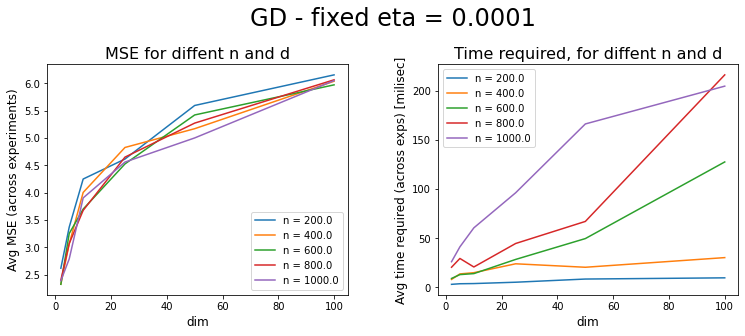

In [67]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = GD(X_train, X_test, y_train, y_test, "constant", eta = 0.0001)

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('GD - fixed eta = 0.0001', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


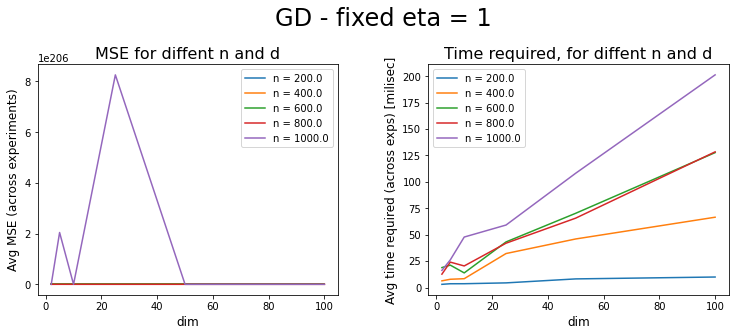

In [68]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = GD(X_train, X_test, y_train, y_test, "constant", eta = 1)

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('GD - fixed eta = 1', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

### Dynamic eta:

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


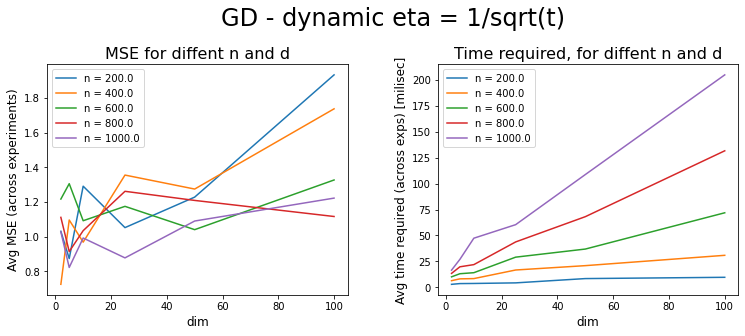

In [73]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = GD(X_train, X_test, y_train, y_test, "decreasing")

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('GD - dynamic eta = 1/sqrt(t)', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

## SGD

### Fixed eta:

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


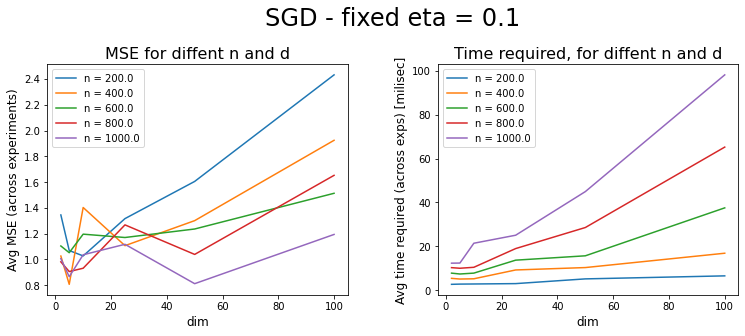

In [69]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = SGD(X_train, X_test, y_train, y_test, "constant")

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('SGD - fixed eta = 0.1', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


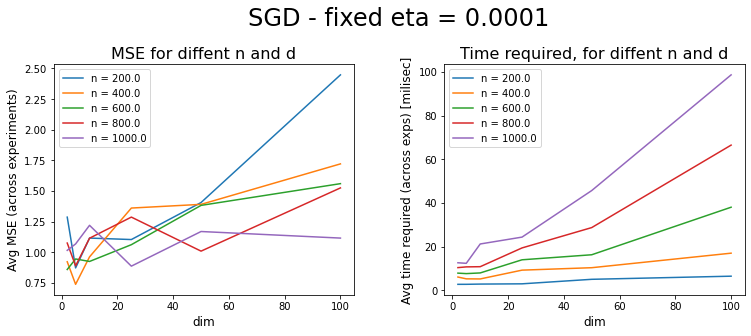

In [70]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = SGD(X_train, X_test, y_train, y_test, "constant", eta = 0.0001)


      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('SGD - fixed eta = 0.0001', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


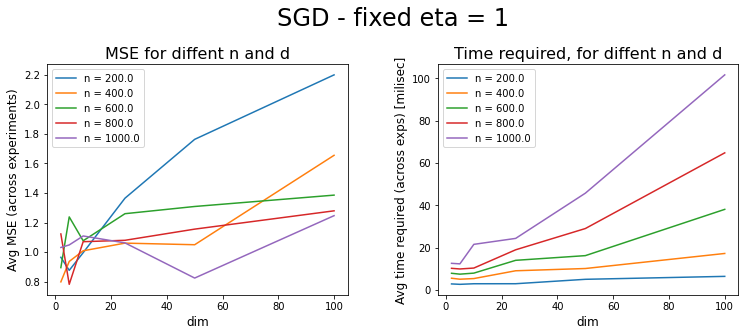

In [71]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = SGD(X_train, X_test, y_train, y_test, "constant", eta = 1)


      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('SGD - fixed eta = 1', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

### Dynamic eta:

computing for n = 200.0
computing for n = 400.0
computing for n = 600.0
computing for n = 800.0
computing for n = 1000.0


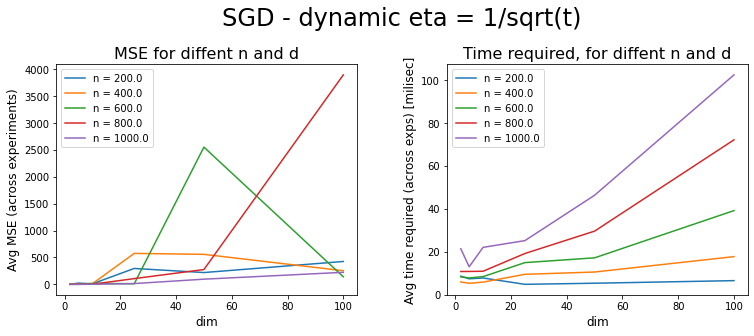

In [72]:
exps = 100
n = [400, 800, 1200, 1600, 2000]
d = [2, 5, 10, 25, 50, 100]

mse_dic = {}
time_dic = {}

for i in range(len(n)):
  print("computing for n = {}".format(n[i]/2))

  for j in range(len(d)):
    mse_list = []
    time_req = []
    for exp in range(exps):
      
      X_train, X_test, y_train, y_test = generate(n[i], d[j])

      mse, time = SGD(X_train, X_test, y_train, y_test, "decreasing")

      mse_list.append(mse)
      time_req.append((time.microseconds + 1000000 * time.seconds)/1000)

    mse_dic["n={} d={}".format(n[i], d[j])] = mean(mse_list)
    time_dic["n={} d={}".format(n[i], d[j])] = mean(time_req)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.8)
fig.suptitle('SGD - dynamic eta = 1/sqrt(t)', y=1.1, size = 24)

for i, ne in enumerate(n):  
  x_values = []
  mse_values = []
  time_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    mse_values.append(mse_dic["n={} d={}".format(ne, de)])
    time_values.append(time_dic["n={} d={}".format(ne, de)])

  ax1.plot(x_values, mse_values, label = "n = {}".format(ne/2))
  ax2.plot(x_values, time_values, label = "n = {}".format(ne/2))
  ax1.legend()
  ax2.legend()
  ax1.set_title("MSE for diffent n and d", size = 16)
  ax2.set_title("Time required, for diffent n and d", size = 16)
  ax1.set_xlabel("dim", size = 12)
  ax1.set_ylabel("Avg MSE (across experiments)", size = 12)
  ax2.set_xlabel("dim", size = 12)
  ax2.set_ylabel("Avg time required (across exps) [milisec]", size = 12)

# Conclusions:

For the ranges of n and d considered:

Generally:

  - MSE:
    - The higher the ratio d/n the worse the algorithms do, since it's hard for them to find the pattern since there's not enough data to learn, compared to all the features it has to predict later on.
    - For low d/n ratio, the MSE tends to the variance (1) of the error term added to y.
  - Runtime:
    - OLS is the fastest by one order of magnitud, compared to GD and SGD.
    - SGD is approximately twice as fast as GD.
    - The higher the dimensions and number of observations, the longer the runtimes.

Particularly:

  - OLS: 
    - The algorithm is quite fast, requiring on average in the order of 10 milliseconds. 
    - The MSE are in par with those of GD.

  - GD:
    - MSE in par with OLS.
    - Slowest algorithm.
    - For fixed learning rates:
      - When the step is too big, the algorithm can diverge and the MSE explode.
      - If the step is too small, the algorithm updates $\hat{w}$ only slightly, therefore it does not learn enough in the fixed iterations we provide. This is clearly seen in the chart for eta = 0.0001, where the MSE is practically the same for all n.
      - For a sensible step size, the algorithm offers smaller MSEs. 


  - SGD:
    - The combination of a dynamic eta with a mini-batch size of 1 can lead to big MSEs.
    - The MSE is slightly worse than the ones offered by GD and OLS.

